In [1]:
import numpy as np
from tqdm.auto import tqdm

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def add_colorbar(vec, ax, label):
    normalize = mcolors.Normalize(vmin=vec.min(), vmax=vec.max())
    colormap = plt.cm.plasma
    scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(vec)
    cbar = fig.colorbar(scalarmappaple, ax = ax)
    cbar.set_label(label)

import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
plt.rcParams.update({'font.size': 12})
plt.rc('axes', labelsize=14) 

# $P(L)$

In [3]:
def prob_L(L, Ps):
    '''
    :L (scalar): number of steps
    :Ps (array): probability of staying, at each L
    '''    
    return (1-Ps[L])*np.prod(Ps[:L])

# Constant $P_s$

In [10]:
L_max = 50
Ps = np.ones(L_max)*(1/2)

p_l = []
for l in range(0, L_max-1):
    p_l.append(prob_L(l, Ps))    

(0.0001, 1)

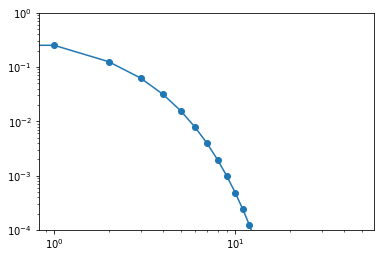

In [11]:
plt.loglog(p_l, 'o-')
plt.ylim(1e-4,1)

**Numerical check**

In [16]:
runs = int(1e6)
num_l = np.zeros(runs)

for run in tqdm(range(runs)):
    
    for l in range(L_max):
        if np.random.rand() > Ps[l]:
            break
            
    num_l[run] = l
counts = np.bincount(num_l.astype(int))

  0%|          | 0/1000000 [00:00<?, ?it/s]

(1e-06, 1)

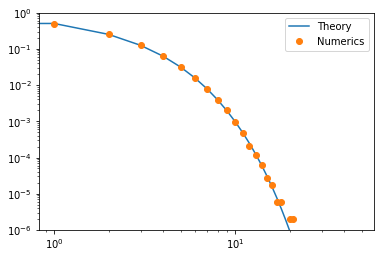

In [19]:
plt.loglog(p_l/max(p_l), label = 'Theory')
plt.loglog(counts/max(counts), 'o', label = 'Numerics')
plt.legend()
plt.ylim(1e-6,1)

# Reaching power law $P(L)$ - recurrent calculation of $P_s(l)$

In [4]:
from scipy.special import zeta

def get_ps(L, alpha, ps_0 = 1):
    
    ps = np.zeros(L)
    ps[0] = ps_0    
    
    for l in range(2, L+1):
                
        # product
        prod = np.prod(ps[:l-1])
        # P(L-1)
        p_lm1 = (1/zeta(alpha+1, q = 1))*(l-1)**(-alpha-1)
        # all together
        ps[l-1] = 1-p_lm1/prod
        
    return ps

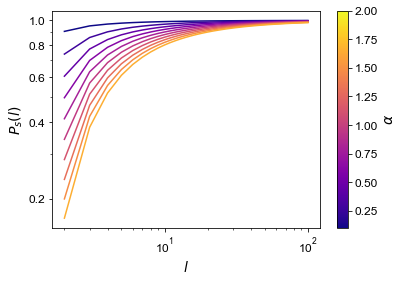

In [5]:
L = 100
alphas = np.linspace(0.1, 2, 10)
colors = plt.cm.plasma(np.linspace(0,1,len(alphas)+2))

fig, ax = plt.subplots()
for alpha, color in zip(alphas, colors):
    ps = get_ps(L, alpha = alpha, ps_0 = 1)
    ax.loglog(np.arange(2, L+1), ps[1:], c = color)
plt.setp(ax, xlabel =r'$l$', ylabel = r'$P_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
# ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())


add_colorbar(alphas, ax, r'$\alpha$')

In [17]:
ps_0 = []
alphas = np.linspace(0.01, 2, 50)
for alpha in alphas:
    ps_0.append(get_ps(2, alpha = alpha, ps_0 = 1)[-1])
    

Text(0.5, 0, '$\\beta$')

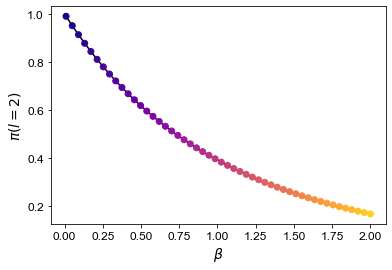

In [21]:
fig, ax = plt.subplots()
ax.plot(alphas, ps_0, c = 'k', zorder = -1)
ax.scatter(alphas, ps_0, color = plt.cm.plasma(np.linspace(0,1,len(alphas)+5)[:-5]))
ax.set_ylabel('$\pi(l=2)$')
ax.set_xlabel(r'$\beta$')

## Computing $P(L)$ from $P_s$

#### Normal scenario

In [13]:
L = 5000
alpha = 1.2
ps = get_ps(L, alpha = alpha)

p_l = []
for l in range(1, L):
    p_l.append(prob_L(l, ps))

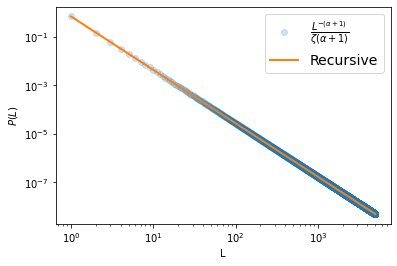

In [30]:
PL= (1/zeta(alpha+1, q = 1))*np.arange(1,L).astype(float)**(-1-alpha)
plt.loglog(np.arange(1,L), PL, 'o', alpha = 0.2, label = r'$\frac{L^{-(\alpha+1)}}{\zeta(\alpha+1)}$')
plt.loglog(np.arange(1,L), p_l, lw = 2, label = 'Recursive')

# plt.loglog(np.arange(1,L).astype(float)**(-1))
plt.xlabel('L'); plt.ylabel(r'$P(L)$')
# plt.ylim(1e-8, 1)
plt.legend(fontsize = 14)

### Considering a cutoff after $n$ steps

In [14]:
ps_cutoff = get_ps(L, alpha = alpha)
ps_cutoff[50:] = ps_cutoff[30]*

L_max = L
Ps = ps_cutoff.copy()
Pr = 1-Ps

p_l_cutoff = []
for l in range(1, L_max):
    p_l_cutoff.append(prob_L(l, Ps))

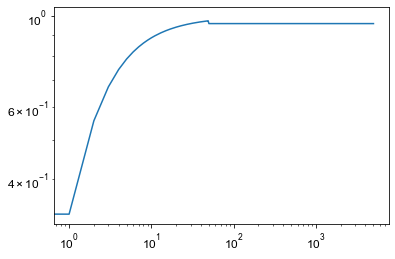

In [16]:
plt.loglog(ps_cutoff)

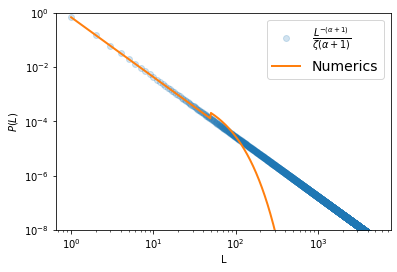

In [40]:
PL= (1/zeta(alpha+1, q = 1))*np.arange(1,L).astype(float)**(-1-alpha)
plt.loglog(np.arange(1,L), PL, 'o', alpha = 0.2, label = r'$\frac{L^{-(\alpha+1)}}{\zeta(\alpha+1)}$')
plt.loglog(np.arange(1,L), p_l_cutoff, lw = 2, label = 'Numerics')

# plt.loglog(np.arange(1,L).astype(float)**(-1))
plt.xlabel('L'); plt.ylabel(r'$P(L)$')
plt.ylim(1e-8, 1)
plt.legend(fontsize = 14)

### Adding cutoff to powerlaw

In [3]:
from sympy import harmonic

In [18]:
from sympy import harmonic, N as Nsym

def pw_strict_cutoff(L, alpha, Lmax = 100):
    if L > Lmax:
        return 0
    else:
        return L**(-alpha-1)/float(harmonic(Lmax, alpha+1))
pw_strict_cutoff(10, 0.5, Lmax = 100)

ZeroDivisionError: float division by zero

In [83]:
from mpmath import polylog

def pw_exp(L, alpha = 1, xi = 0.01):
    return L**(-1-alpha)*np.exp(-xi*L)/float(polylog(1+alpha, np.exp(-xi)))

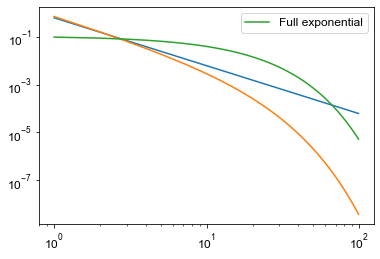

In [99]:
Lmax = 100
pl = pw_exp(np.arange(1,Lmax).astype(float), 1, 0)
plt.loglog(np.arange(1, Lmax), pl)
pl = pw_exp(np.arange(1,Lmax).astype(float), 1, 0.1)
plt.loglog(np.arange(1, Lmax), pl)
pl = pw_exp(np.arange(1,Lmax).astype(float), -1, 0.1)
plt.loglog(np.arange(1, Lmax), pl, label = 'Full exponential')
plt.legend()

In [84]:
from scipy.special import zeta

def ps_exp_cutoff(L, alpha, xi, ps_0 = 1):
    
    ps = np.zeros(L)
    ps[0] = ps_0    
    
    for l in range(2, L+1):
                
        # product
        prod = np.prod(ps[:l-1])
        # P(L-1)
        p_lm1 = pw_exp(l-1, alpha, xi)
        # all together
        ps[l-1] = 1-p_lm1/prod
        
    return ps

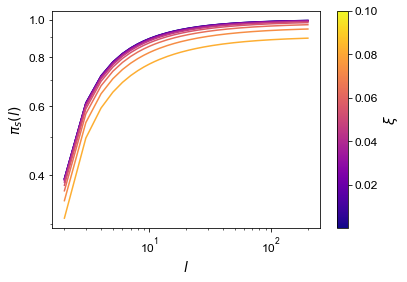

In [89]:
L = 200
xis = np.logspace(-4, -1, 10)
colors = plt.cm.plasma(np.linspace(0,1,len(betas)+2))
alpha = 1
fig, ax = plt.subplots()

ps = np.zeros((len(betas), L))
for idx, (xi, color) in enumerate(zip(xis, colors)):
    ps[idx, :] = ps_exp_cutoff(L, alpha = alpha, xi = xi, ps_0 = 1)
    ax.loglog(np.arange(2, L+1), ps[idx, 1:], c = color)
    
plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.4, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.4, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
# ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())


add_colorbar(betas, ax, r'$\xi$')

[Text(0.5, 0, '$\\xi$'), None, Text(0.5, 0, '$\\xi$'), None]

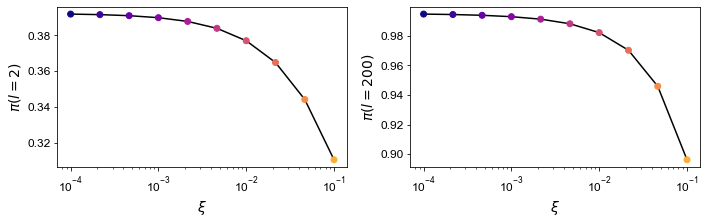

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (6*1.618, 3), constrained_layout = True)
ax[0].plot(betas, ps[:, 1], c = 'k', zorder = -1)
ax[0].scatter(betas, ps[:, 1], color = plt.cm.plasma(np.linspace(0,1,len(betas)+2)[:-2]))
ax[0].set_ylabel('$\pi(l=2)$')

ax[1].plot(betas, ps[:, -1], c = 'k', zorder = -1)
ax[1].scatter(betas, ps[:, -1], color = plt.cm.plasma(np.linspace(0,1,len(betas)+2)[:-2]))
ax[1].set_ylabel(fr'$\pi(l={L})$')

plt.setp(ax, xlabel = r'$\xi$', xscale = 'log')

# Composite Brownian

Some experimental values: probs = [0.867, 0.099, 0.034] , $\lambda$s = [0.28, 1.5, 14.5] mm

In [6]:
def prob_L_composite(L, num_modes = 3, lambdas = None, probs = None, l0 = 0):  
#     if lambdas  is None:
#         probs = np.random.rand(num_modes)
#         probs/= np.sum(probs)
#     if lambdas is None:
#         lambdas = 10*np.random.rand(num_modes)
        
    return np.sum((probs)*(np.exp(1/lambdas)-1)*np.exp(-L/lambdas))

In [46]:
probs = [0.867, 0.99]
probs/= np.sum(probs)
lambdas = np.array([1,150])

Ls = np.arange(1, 1000).astype(float)
p_l = np.zeros_like(Ls).astype(float)
for idxl, L in enumerate(Ls):
    p_l[idxl] = prob_L_composite(L, lambdas = lambdas, probs = probs)

(1e-05, 0.5199472034775873)

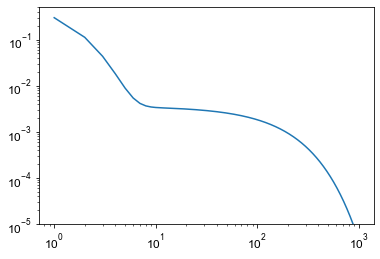

In [47]:
plt.loglog(Ls, p_l)
plt.ylim(ymin = 1e-5)

In [34]:
from scipy.special import zeta

def get_ps_composite(L, lambdas = None, probs = None, ps_0 = 1):
    
    ps = np.zeros(L)
    ps[0] = ps_0    
    
    for l in range(2, L+1):
                
        # product
        prod = np.prod(ps[:l-1])
        # P(L-1)
        p_lm1 = prob_L_composite(l-1, lambdas = lambdas, probs = probs)
        # all together
        ps[l-1] = 1-p_lm1/prod
        
    return ps

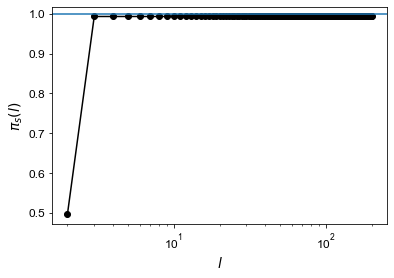

In [53]:
L = 200
probs = [0.5, 0.5]
probs/= np.sum(probs)
lambdas = np.array([0.01,150])

colors = plt.cm.plasma(np.linspace(0,1,6+2))



ps_composite = get_ps_composite(L, lambdas = lambdas, probs = probs)

    
_, ax = plt.subplots()
ax.plot(np.arange(2, L+1), ps_composite[1:], '-o', c = 'k')

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         xscale = 'log') ;  
ax.axhline(1)

# Simulating walks from $P_s$
We will simulate the walk of an agent with policy $P_s$ such as to have a power law $P(L)$. This should translate into superdiffusive walks. From [Zaburdaev's review](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.87.483), we should have a walk following:
$$
  \left <x^2(t)\right> \propto
    \begin{cases}
      t^2 & 0 < \alpha < 1, \\ t^2/\ln t & \alpha = 1, \\ t^{3-\alpha} & 1<\alpha <2, \\
      t\ln t & \alpha = 2 \\ t & \alpha > 2
    \end{cases}       
$$

In [36]:
def walk_from_policy(T, policy, return_steps = False):
    '''Inputs:
    :T (int): Number of steps
    :policy (array): probability of staying in same direction at each time. If at some point
                     time > len(policy), the agent will rotate.
                     
     Ps(1) = 1 IS ALREADY CONSIDERED, DON'T INPUT IT!!!'''
    
    pos = np.zeros((T, 2))    
    direction = np.random.rand()*360 
    internal_clock = 0
    steps = []
    for t in range(1, T):   
        pos[t, 0] = pos[t-1, 0] + np.cos(direction)
        pos[t, 1] = pos[t-1, 1] + np.sin(direction)
        
        if np.random.rand() > policy[internal_clock]:
            steps.append(internal_clock)
            internal_clock = 0
            direction = np.random.rand()*360 
        else:
            internal_clock += 1
            
    if return_steps:
        return pos, steps
    else:
        return pos  

In [162]:
T = 1000; N = 100
alphas = np.linspace(0, 2, 100)

msd = np.zeros((len(alphas), 2*N, T))
for idxa, alpha in enumerate(tqdm(alphas)):

    ps = get_ps(L = T, alpha = alpha)
    
    for idx in (range(100)):
        pos = walk_from_policy(T = T, policy = ps[1:])

        msd[idxa, idx, :] = pos[:, 0]
        msd[idxa, 2*idx, :] = pos[:, 1]
    
#     exp = np.mean([msd_analysis().get_exponent(pos[:,0]), msd_analysis().get_exponent(pos[:,1])])
#     exponent.append(exp)

  0%|          | 0/100 [00:00<?, ?it/s]

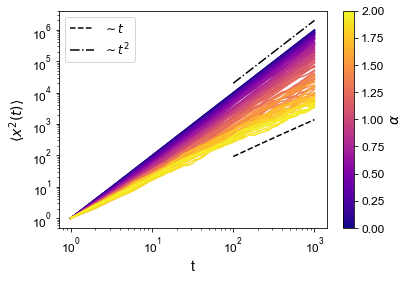

In [168]:
colors = plt.cm.plasma(np.linspace(0,1,len(alphas)+2))
fig, ax = plt.subplots()

for m, c in zip(msd, colors):
    m = (m.copy()**2).mean(0)
    ax.loglog(np.arange(1, T), m[1:]/m[1], c = c)
init = 100
ax.plot(np.arange(init, T), 0.2*np.arange(init, T)*np.log(np.arange(init, T)), '--', c = 'k', label = r'$\sim t$')
ax.plot(np.arange(init, T), 2*np.arange(init, T)**2, '-.', c = 'k', label = r'$\sim t^2$')
add_colorbar(alphas, ax, r'$\alpha$')
plt.setp(ax, xlabel = 't', ylabel = r'$\left < x^2 (t) \right >$')
ax.legend()

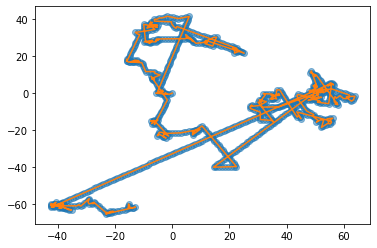

In [46]:
plt.plot(pos[:,0], pos[:, 1], 'o', alpha = 0.5)
plt.plot(pos[:,0], pos[:, 1])


#### Figure draft

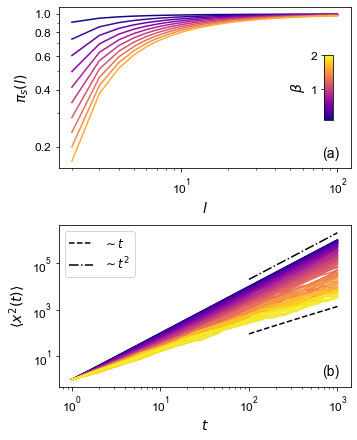

In [224]:
fig, [ax_p, ax_m] = plt.subplots(2, 1, figsize = (3*1.618, 6), constrained_layout = True)

###### Optimal pi_s
L = 100
alphas_ps = np.linspace(0.1, 2, 10)
colors = plt.cm.plasma(np.linspace(0,1,len(alphas_ps)+2))

for alpha, color in zip(alphas_ps, colors):
    ps = get_ps(L, alpha = alpha, ps_0 = 1)
    ax_p.loglog(np.arange(2, L+1), ps[1:], c = color)
plt.setp(ax_p, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
ax_p.yaxis.set_minor_formatter(NullFormatter())

####### MSD
alphas_msd = np.linspace(0, 2, 100)
colors = plt.cm.plasma(np.linspace(0,1,len(alphas_msd)+2))
for m, c in zip(msd, colors):
    m = (m.copy()**2).mean(0)
    ax_m.loglog(np.arange(1, T), m[1:]/m[1], c = c)
init = 100
ax_m.plot(np.arange(init, T), 0.2*np.arange(init, T)*np.log(np.arange(init, T)), '--', c = 'k', label = r'$\sim t$')
ax_m.plot(np.arange(init, T), 2*np.arange(init, T)**2, '-.', c = 'k', label = r'$\sim t^2$')

plt.setp(ax_m, xlabel = r'$t$', ylabel = r'$\left < x^2 (t) \right >$')
ax_m.legend()


####### colorbar
ax_c = ax_p.inset_axes([0.91,0.3,0.03,0.4])
vec = alphas_ps
scalarmappaple = plt.cm.ScalarMappable(norm=mcolors.Normalize(vmin=vec.min(), vmax=vec.max()), 
                                       cmap=plt.cm.plasma)
scalarmappaple.set_array(vec)
cbar = fig.colorbar(scalarmappaple, cax = ax_c)
cbar.set_label(r'$\beta$')
ax_c.yaxis.set_ticks_position('left')
ax_c.yaxis.set_label_position('left')

##### labels
for ax, let in zip([ax_p, ax_m], 'ab'):
    ax.annotate('('+let+')', (0.96, 0.05), c = 'k', xycoords = 'axes fraction', va = 'bottom', ha = 'right', fontsize = 14)
    
plt.savefig('../figures/pi_s_and_msd.pdf', transparent = True)

In [212]:
'('+let+')'

'(a)'

In [ ]:
 
scalarmappaple = plt.cm.ScalarMappable(norm=mcolors.Normalize(vmin=vec.min(), vmax=vec.max()), 
                                       cmap=plt.cm.plasma)
scalarmappaple.set_array(vec)
cbar = fig.colorbar(scalarmappaple, ax = ax)
cbar.set_label(label)

In [46]:
N = 100; Nt = 50; T = 5; L = 100; at = 10; ls = 1
t = 0
pos = np.random.rand(N, T, 2)*L
traps_pos = np.random.rand(Nt, T, 2)*L
dist = models_phenom()._get_distance(np.vstack((traps_pos[:, t, :], pos[:, t, :])))[Nt:, :Nt]
idx_close = np.argwhere(dist < at).
angles = np.random.uniform(low = 0, high = 2*np.pi, size = idx_close.shape[0])
pos[idx_close[:, 0], t, :] = traps_pos[idx_close[:, 1], t, :] + np.vstack((ls*np.cos(angles),ls*np.sin(angles))).transpose()

# Simulating learning
We will simulate the learning of an agent exploring a target environment. For a given environment, we set the optimal $\alpha$. To begin we consider $\alpha\rightarrow 2$. Then, the targets must be collected at the end of the steps sampled from this distribution. We reward this sequence of steps (consider $\eta$ glow, a.k.a. discount factor).

In [5]:
class simul_ps():
    def __init__(self, num_states, eta, gamma):     
        
        self.num_states = num_states
    
        self.h_matrix = np.ones(num_states)        
        self.eta = eta
        self.gamma_damping = gamma
        
        self.g_matrix = np.zeros(num_states)
    
    def reward(self, state, reward = 1):
        
        # updating the g-matrix
        self.g_matrix[:state] += 1        
        self.g_matrix[:state] = (self.eta**np.arange(state))[::-1]
        
        
        self.h_matrix =  self.h_matrix - self.gamma_damping * (self.h_matrix - 1.) + self.g_matrix*reward
        
        
        
        

In [84]:
class simul_2actions():
    def __init__(self, num_states, eta, gamma):     
        
        self.num_states = num_states
    
        self.h_matrix = np.ones((2, self.num_states)).astype(float)
        self.eta = eta
        self.gamma_damping = gamma
        
        self.reset()
        
    def reset(self):
        self.g_matrix = np.zeros((2, self.num_states)).astype(float)
        
    
#     def reward(self, state, reward = 1):
        
#         # updating the STAY part of g-matrix
#         # set to one all previous states
#         self.g_matrix[0, :state+1] += 1   
#         # multiply by eta**x all previous states
#         self.g_matrix[0, :state+1] *= (self.eta**np.arange(state+1))[::-1]
#         # multiply the rest of the matrix by number of steps don
#         self.g_matrix[0, state+1:] *= self.eta**state
        
#         # updating the ROTATE part of g-matrix
#         self.g_matrix[1, :] *= self.eta**state
#         self.g_matrix[1, state] = +1
        
#         for _ in range(state):
#             self.h_matrix -= self.gamma_damping*(self.h_matrix - 1.)
        
#         self.h_matrix += self.g_matrix*reward
        
        
        
    def reward(self, length, reward = 1):
            #NOTE: state is length-1 because counter starts in 0 
            #(but in 0, agent has already performed a step of length 1 -- from the previous action "rotate").

            factor = 1 - self.eta
            # updating the STAY part of g-matrix
            # damping before adding up the traversed edges.
            self.g_matrix[0, :length-1] *= (factor**np.arange(1,length))
            # set to one all previous states (adding up the traversed edges)
            self.g_matrix[0, :length-1] += 1   
            # multiply by eta**x all previous states
            self.g_matrix[0, :length-1] *= (factor**np.arange(1,length))[::-1]
            # multiply the rest of the matrix by number of steps don
            self.g_matrix[0, length-1:] *= factor**length

            # updating the ROTATE part of g-matrix
            self.g_matrix[1, :] *= factor**length
            self.g_matrix[1, length-1] += 1
            
            if self.gamma_damping > 0:
                for _ in range(length):
                    self.h_matrix -= self.gamma_damping*(self.h_matrix - 1.)

            self.h_matrix += self.g_matrix*reward

In [68]:
def discrete_pw_sample(alpha, L_max=1000, num_samples = 1):
    probs = (1/zeta(alpha+1, q = 1))*(np.arange(1, L_max).astype(float)**(-alpha-1))
    # normalize to take into accont L_max not infinity
    probs /= np.sum(probs)
    return np.random.choice(np.arange(1, L_max), p = probs, size = num_samples)

In [97]:
samples = discrete_pw_sample(2, num_samples=int(1e6))

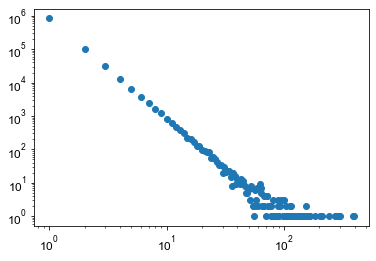

In [98]:
u, c = np.unique(samples, return_counts=True)
plt.loglog(u, c, 'o')
# plt.loglog(np.arange(1,L), probs)

## simul training 

In [153]:
np.linspace(0.2, 2, 4)

array([0.2, 0.8, 1.4, 2. ])

In [177]:
alphas =  np.linspace(0.5, 2, 4)
num_states = 1000
hmatrix_a = np.zeros((len(alphas), 2, num_states))

epochs = int(1e4); steps = int(1e3)
for idxa, alpha in enumerate(tqdm(alphas)):
    
    ps = simul_2actions(num_states = num_states,
                        eta = 0.001,
                        gamma = 0)
    step = []
    for e in tqdm(range(epochs)):

        ps.reset()

        for s in range(steps):    
            step.append(int(discrete_pw_sample(alpha)))
            ps.reward(length = step[-1])
    hmatrix_a[idxa] = ps.h_matrix

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

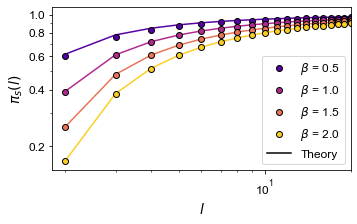

In [207]:
fig, ax = plt.subplots(figsize = (3*1.618, 3), constrained_layout = True)
for idx, (h, alpha) in enumerate(zip(hmatrix_a, alphas)):
    if idx == 0: label = 'Theory'
    else: label = ''
    
    theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
    ax.loglog(np.arange(2, num_states+1), theory[1:], c = plt.cm.plasma((alpha-0.2)/2))
    ax.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), 'o', c = plt.cm.plasma((alpha-0.2)/2),  label = fr'$\beta$ = {alpha}', alpha = 1, markeredgecolor='k')
    #theoretical
    
ax.plot(10, 10, label = 'Theory', c = 'k')   

# plt.setp(ax, xscale = 'log',
#          xlabel =r'$l$', ylabel = r'$\pi_s(l)$',)
ax.legend()
# ax.xscale('log')
# plt.yscale('log')
ax.set_xlim(1.8, 20)
ax.set_ylim(0.15, 1.1)

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
ax.yaxis.set_minor_formatter(NullFormatter())
fig.savefig('../figures/pi_s_theory_training.pdf', transparent = True)

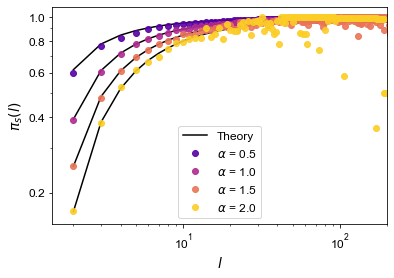

In [176]:
fig, ax = plt.subplots()
for idx, (h, alpha) in enumerate(zip(hmatrix_a, alphas)):
    if idx == 0: label = 'Theory'
    else: label = ''
    ax.loglog(np.arange(2, num_states+1), theory[1:], c = 'k', label = label, zorder = -1)
    ax.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), 'o', c = plt.cm.plasma((alpha-0.2)/2),  label = fr'$\alpha$ = {alpha}', alpha = 0.9)
    #theoretical
    theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
    
# plt.setp(ax, xscale = 'log',
#          xlabel =r'$l$', ylabel = r'$\pi_s(l)$',)
ax.legend()
# ax.xscale('log')
# plt.yscale('log')
ax.set_xlim(xmax = 200)
ax.set_ylim(0.15, 1.1)

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
ax.yaxis.set_minor_formatter(NullFormatter())


### $\alpha = 1$ ($\gamma = 0$, $\eta = 0.001$)

(1.4657496244162596, 200)

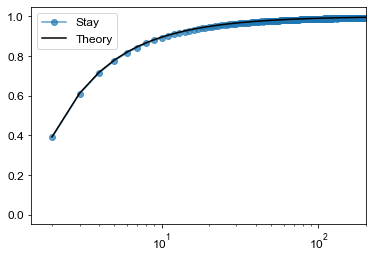

In [123]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.7)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', label = 'Theory')

plt.legend()
plt.xscale('log')
plt.xlim(xmax = 200)

### $\alpha = 2$ ($\gamma = 0$, $\eta = 0.001$)

(1.4657496244162596, 200)

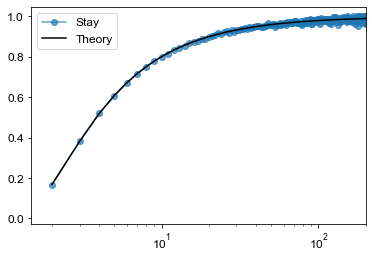

In [121]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.7)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', label = 'Theory')

plt.legend()
plt.xscale('log')
plt.xlim(xmax = 200)

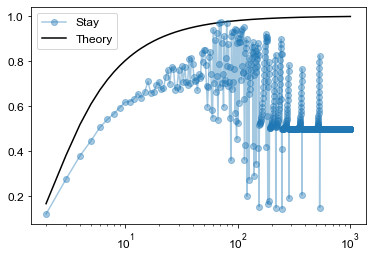

In [112]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

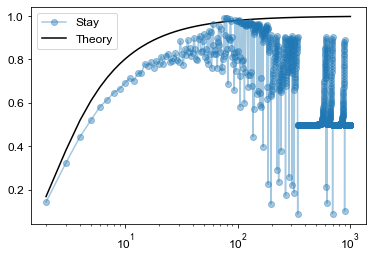

In [110]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

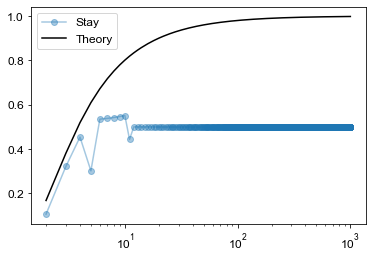

In [108]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

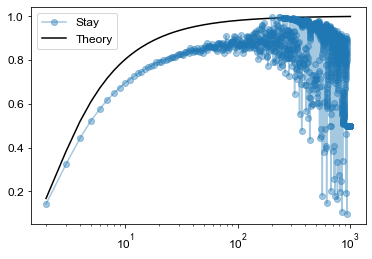

In [106]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

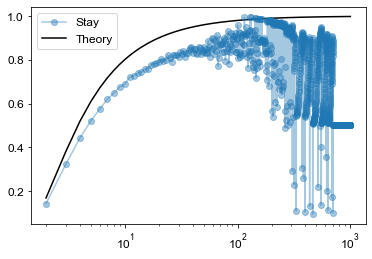

In [93]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

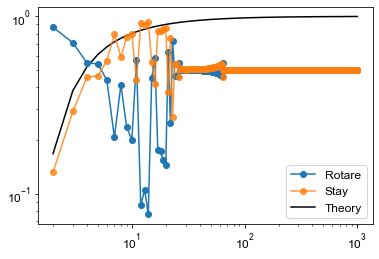

In [81]:
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.8)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.loglog(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

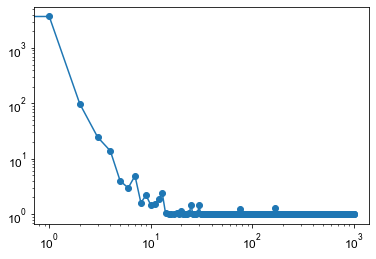

In [38]:
plt.loglog(ps.h_matrix[0,:], '-o')

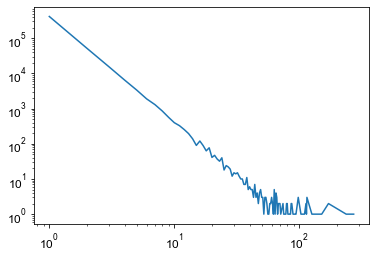

In [311]:
u,c = np.unique(step, return_counts = True)
plt.loglog(u, c)

In [124]:
def policy_theory(l, eta, alpha, reward = 1, L_max = int(1e4)):
    
    probs = (1/zeta(alpha+1, q = 1))*(np.arange(l, L_max).astype(float)**(-alpha-1))
    etas_exp = (eta**np.arange(L_max-l))
    
    return (probs*etas_exp*reward).sum()

In [139]:
L_max = int(1e4); eta = 1; alpha = 1.01
p = []
for l in range(1, L_max):
    p.append(policy_theory(l, eta, alpha))
    

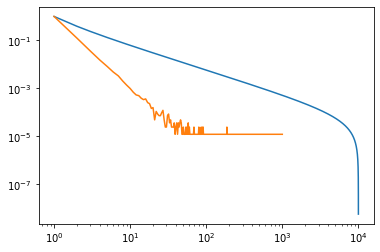

In [140]:
plt.loglog(np.arange(1, L_max), p)
plt.loglog(np.arange(1, ps.num_states+1), ps.h_matrix/ps.h_matrix[0])

In [123]:
l = 1
L_max = 10
eta**np.arange(L_max-l)

array([1.        , 0.5       , 0.25      , 0.125     , 0.0625    ,
       0.03125   , 0.015625  , 0.0078125 , 0.00390625])

# Recovering a power law and superdiffusion from truncated $\pi_s(L)$
We will first get $\pi_s$ and then truncate it to see what distribution we find and which diffusion exponent we get

In [24]:
L = 1000; alpha = 0.5
ps = get_ps(L, alpha = alpha, ps_0 = 1)

In [50]:
L_trunc = 100; xi = 0.001
trunc = np.ones_like(ps)
trunc[L_trunc:] = np.exp(-xi*np.arange(L- L_trunc))

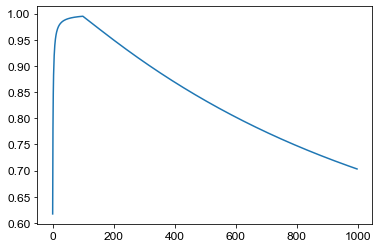

In [51]:
truncated_policy = ps*(trunc/2+0.5)
plt.plot(truncated_policy[1:])

In [52]:
T = int(1e5); N = 100

msd = np.zeros((2*N, T))
steps = []
    
for idx in tqdm(range(N)):
    pos, st = walk_from_policy(T = T, policy = truncated_policy[1:], return_steps = True)
    
    steps += st
    msd[idx, :] = pos[:, 0]
    msd[2*idx, :] = pos[:, 1]

  0%|          | 0/100 [00:00<?, ?it/s]

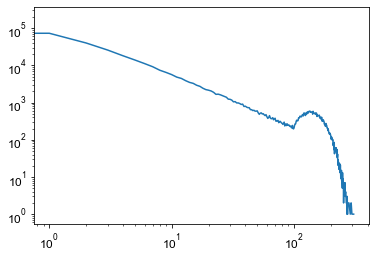

In [53]:
unique, counts = np.unique(steps, return_counts=True)
plt.loglog(unique, counts)

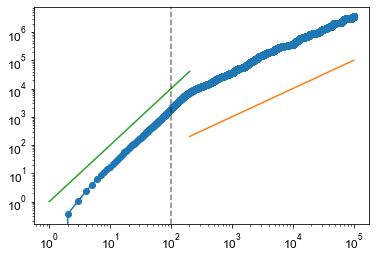

In [62]:
time = np.arange(1, T+1); init = 200
plt.loglog(time, (msd**2).mean(0), '-o')
plt.loglog(time[init:], time[init:])
plt.loglog(time[:init], time[:init]**2)
plt.axvline(L_trunc, c = 'k', ls = '--', alpha = 0.5)

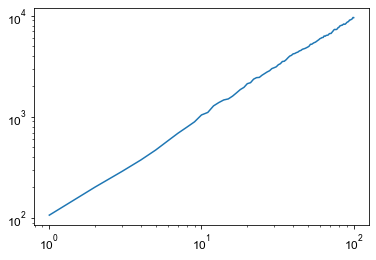

In [124]:
plt.loglog(np.arange(1, 101), (np.cumsum(10*np.random.randn(500, 100), axis = 1)**2).mean(0))

# Learning $\pi_s(L) = P(L)$
Only makes sense with $\eta = 1$ (i.e. what you have done in prior steps is useless!!!!!)

In [94]:
class simul_pl_learning():
    def __init__(self, L_max, eta, gamma):     
        
        
        self.L_max = L_max
        
        self.num_states = 1    
        self.h_matrix = np.ones(self.L_max).astype(float)
        self.eta = eta
        self.gamma_damping = gamma
        
        self.reset()
        
    def reset(self):
        self.g_matrix = np.zeros(self.L_max).astype(float)              
        
        
    def reward(self, length, reward = 1):
            #NOTE: state is length-1 because counter starts in 0 
            #(but in 0, agent has already performed a step of length 1 -- from the previous action "rotate").

            factor = 1 - self.eta
            
            # damping before adding up the traversed edges.
            self.g_matrix[:length] *= (factor**np.arange(length))
            # set to one all previous states (adding up the traversed edges)
            self.g_matrix[:length] += 1   
            # multiply by eta**x all previous states
            self.g_matrix[:length] *= (factor**np.arange(length))[::-1]
            # multiply the rest of the matrix by number of steps don
            self.g_matrix[length:] *= factor**length

            
            if self.gamma_damping > 0:
                for _ in range(length):
                    self.h_matrix -= self.gamma_damping*(self.h_matrix - 1.)

            self.h_matrix += self.g_matrix*reward

In [112]:
k = np.ones(10)
length = 5
k[:length] *= (factor**np.arange(length))
k[:length] += 1
k[:length] *= (factor**np.arange(length))[::-1]
k[length:] *= factor**length
k

array([1.3122 , 1.3851 , 1.4661 , 1.5561 , 1.6561 , 0.59049, 0.59049,
       0.59049, 0.59049, 0.59049])

In [ ]:
            # set to one all previous states (adding up the traversed edges)
            self.g_matrix[:length] += 1   
            # multiply by eta**x all previous states
            self.g_matrix[:length] *= (factor**np.arange(length))[::-1]

In [120]:
alphas =  [0.5, 1, 1.5]
L_max = 1000
hmatrix_a = np.zeros((len(alphas), L_max))

epochs = int(1e3); steps = int(1e2)
for idxa, alpha in enumerate(tqdm(alphas)):
    
    ps = simul_pl_learning(L_max = L_max,
                           eta = 1,
                           gamma = 0)
    step = []
    for e in tqdm(range(epochs)):

        ps.reset()

        for s in range(steps):    
            
            current_step = int(discrete_pw_sample(alpha))
            while current_step > L_max:
                current_step = int(discrete_pw_sample(alpha))
                
            step.append(current_step)
            ps.reward(length = step[-1])
    hmatrix_a[idxa] = ps.h_matrix

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

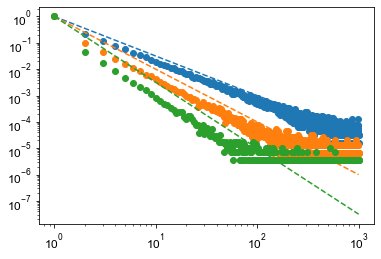

In [121]:
for idx, hm in enumerate(hmatrix_a):
    plt.loglog(np.arange(1, L_max+1), hm/hm[0], 'o')
    plt.loglog(np.arange(1, L_max+1), np.arange(1, L_max+1).astype(float)**(-alphas[idx]-1), c = f'C{idx}', ls = '--')
# plt.xlim(xmax = 300)

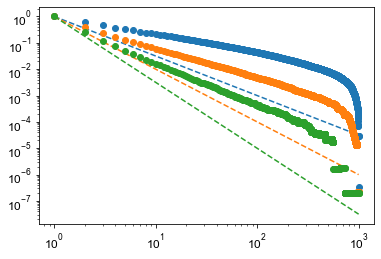

In [106]:
for idx, hm in enumerate(hmatrix_a):
    plt.loglog(np.arange(1, L_max+1), hm/hm[0], 'o')
    plt.loglog(np.arange(1, L_max+1), np.arange(1, L_max+1).astype(float)**(-alphas[idx]-1), c = f'C{idx}', ls = '--')
# plt.xlim(xmax = 300)

In [89]:
u

array([100])

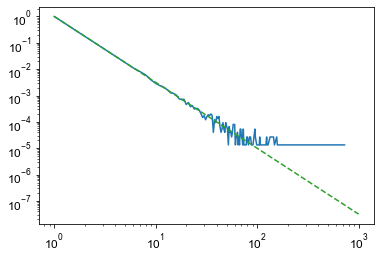

In [104]:
u,c= np.unique(step, return_counts=True)
plt.loglog(u,c/c[0])
plt.loglog(np.arange(1, L_max+1), np.arange(1, L_max+1).astype(float)**(-alphas[idx]-1), c = f'C{idx}', ls = '--')